# CSMODEL Machine Project (Phase 1) ☕✨
This Jupyter Notebook was made in compliance with the requirements set by the course Statistical Modelling and Simulation (CSMODEL). 

This machine project was prepared by the following students from section S16:
- Filipino, Eunice Marble R.
- Lazaro, Heisel Janine C.
- Punsalan, Emmanuel Gerald G.
- Wee, Justine Erika D.


# Import Libraries ⬇️

The following libraries are imported to provide essential functionalities for data processing, analysis, and visualization throughout this project:

In [2]:
%pip install openpyxl
%pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Data Description ℹ️✨
The [Coffee Bean Sales Dataset](https://www.kaggle.com/datasets/saadharoon27/coffee-bean-sales-raw-dataset/data) provides comprehensive insights into the coffee industry. It contains detailed information on coffee orders, customer profiles and product details. The dataset is divided into three worksheets, providing specific information about orders, customers and products. The orders worksheet reflects the coffee transactions made by customers. The customers worksheet contains specific details on the customers. Lastly, the products worksheet details each coffee product.

### How the data was collected

The dataset was acquired from [Kaggle](https://www.kaggle.com) which houses datasets that may be from open sources, web scraping, or simulations. It is not outwardly stated how the coffee bean sales dataset was gathered, but it can be assumed that it was artificially generated for educational purposes due to the lack of details and metadata surrounding the orders.

### Potential Implications

As the data was collected through unknown sources, there are potential implications on how information was recorded. The lack of standardization across dataset fields may lead to discrepancies, inconsistencies, or misleading conclusions during data analysis. Additionally, the lack of metadata challenges to determine the scope of the dataset—increasing the risk of sampling bias. It also imposes constraints in preprocessing since the dataset was provided in a pre-cleaned format; hence, further restricting the accuracy and relevance of the insights that will be generated.

### Dataset Overview (Structure and Attributes)

The dataset is divided into three worksheets, which are the following:

**Orders:** Consists of **1,000 observations** and **9 variables**, where each observation represents an order. The attributes of which include:

| **Attribute** | **Description**                              |
|---------------|----------------------------------------------|
| **Order ID**  | A unique identifier for each order           |
| **Order Date**| The date the order was placed                |
| **Customer ID** | A reference to the customer who placed the order |
| **Product ID** | A reference to the product ordered          |
| **Quantity**  | The number of units ordered                  |

**Customers:** Consists of **1,000 observations** and **9 variables**, where each observation represents a distinct customer. The attributes of which include:

| **Attribute**     | **Description**                        |
|-------------------|----------------------------------------|
| **Customer ID**   | A unique identifier for each customer  |
| **Customer Name** | The full name of the customer          |
| **Email Address** | Contact email of the customer          |
| **Phone Number**  | Customer’s phone contact               |
| **Address Line 1**  | Primary street address of the customer |
| **City**            | City of the customer’s address         |
| **Country**         | Country of residence                   |
| **Postcode**        | Postal/ZIP code of the customer’s address |
| **Loyalty Card**    | Indicates whether the customer has a loyalty card (Yes/No) |

**Products:** Consists of **48 observations** and **7 variables**, where each observation represents a unique coffee product. The attributes of which include:

| **Attribute**     | **Description**                                     |
|-------------------|--------------------------------------------------- |
| **Product ID**    | A unique identifier for each product                |
| **Coffee Type**   | The blend or type of coffee (e.g., Arabica, Robusta)|
| **Roast Type**    | The level of roast (e.g., light, medium, dark)      |
| **Size**          | Packaging size of the product                      |
| **Unit Price**    | Retail price per unit                              |
| **Price per 100g**| Standardized pricing for comparison                |
| **Profit**        | Profitability of each product                      |

# Reading the Dataset 📝

With all that in mind, let's load in the dataset!

In [3]:
# Reading the Excel file
file_path = 'Coffee Bean Dataset.xlsx'

# Loading each worksheet into a separate DataFrame
orders = pd.read_excel(file_path, sheet_name = 'orders')
customers = pd.read_excel(file_path, sheet_name = 'customers')
products = pd.read_excel(file_path, sheet_name = 'products')

We should take a peek into the three worksheets to confirm our loading worked...

In [4]:
orders.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
customers.head()

,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,73342-18763-UW,Piotr Bote,pbote1@yelp.com,+353 (913) 396-4653,2112 Ridgeway Hill,Crumlin,Ireland,D6W,No
2,21125-22134-PX,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,71253-00052-RN,Dene Azema,dazema3@facebook.com,+1 (217) 418-0714,27 Maywood Place,Springfield,United States,62711,Yes
4,23806-46781-OU,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No


In [6]:
products.head()

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965
1,A-L-0.5,Ara,L,0.5,7.770,1.5540,0.69930
2,A-L-1,Ara,L,1.0,12.950,1.2950,1.16550
3,A-L-2.5,Ara,L,2.5,29.785,1.1914,2.68065
4,A-M-0.2,Ara,M,0.2,3.375,1.6875,0.30375


Eureka! The Coffee Bean Dataset has loaded into our Notebook.

But each worksheet only gives us partial information about the data... So, let's join the worksheets together to gain more insights!

In [7]:
# Merging Orders with Customers on 'Customer ID'
orders_customers = pd.merge(orders, customers, on = 'Customer ID', how = 'left')

# Merging the result with Products on 'Product ID'
coffee_df = pd.merge(orders_customers, products, on = 'Product ID', how = 'left')

Let's take another peek but now into the merged dataset.

In [8]:
coffee_df.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name_x,Email_x,Country_x,Coffee Type_x,Roast Type_x,...,City,Country_y,Postcode,Loyalty Card,Coffee Type_y,Roast Type_y,Size_y,Unit Price_y,Price per 100g,Profit
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,NaN,NaN,...,Paterson,United States,7505,Yes,Rob,M,1.0,9.950,0.9950,0.5970
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,NaN,NaN,NaN,NaN,NaN,...,Paterson,United States,7505,Yes,Exc,M,0.5,8.250,1.6500,0.9075
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,NaN,NaN,...,San Antonio,United States,78205,Yes,Ara,L,1.0,12.950,1.2950,1.1655
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,NaN,NaN,...,Cill Airne,Ireland,N41,No,Exc,M,1.0,13.750,1.3750,1.5125
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,NaN,NaN,...,Cill Airne,Ireland,N41,No,Rob,L,2.5,27.485,1.0994,1.6491


We're all set! We can now proceed to cleaning the dataset.

# Data Cleaning 🧹✨ 

Before performing analysis, it is essential to clean the dataset so we ensure accuracy and reliability of results. We'll be handling variables and values with **multiple representations**, **incorrect datatypes**, **missing data**, **duplicate data**, **inconsistent formatting**, and **outliers**.

### Multiple Representations

In [9]:
columns_to_drop = ['Coffee Type_x', 'Roast Type_x', 'Size_x', 'Unit Price_x']
clean_coffee_df = coffee_df.drop(columns=columns_to_drop)
clean_coffee_df = clean_coffee_df.rename(columns={
    'Coffee Type_y': 'Coffee Type',
    'Roast Type_y': 'Roast Type',
    'Size_y': 'Size',
    'Unit Price_y': 'Unit Price'
})
clean_coffee_df.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name_x,Email_x,Country_x,Sales,Customer Name_y,...,City,Country_y,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,NaN,Aloisia Allner,...,Paterson,United States,7505,Yes,Rob,M,1.0,9.950,0.9950,0.5970
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,NaN,NaN,NaN,NaN,Aloisia Allner,...,Paterson,United States,7505,Yes,Exc,M,0.5,8.250,1.6500,0.9075
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,NaN,Jami Redholes,...,San Antonio,United States,78205,Yes,Ara,L,1.0,12.950,1.2950,1.1655
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,NaN,Christoffer O' Shea,...,Cill Airne,Ireland,N41,No,Exc,M,1.0,13.750,1.3750,1.5125
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,NaN,Christoffer O' Shea,...,Cill Airne,Ireland,N41,No,Rob,L,2.5,27.485,1.0994,1.6491


### Incorrect Datatypes

### Missing Data

### Duplicate Data

### Inconsistent Formatting

### Outliers

Our dataset is now squeaky clean! We can now proceed with analysis!

# Target Research Question 🔬✨

#### _`"How can we optimize business strategies by understanding the factors that affect sales?"`_

In order to provide scope, purpose, and clarity, the above question will serve as the main foundation of data analysis upon the Coffee Bean Sale Dataset. It will guide in identifying patterns, relationships, and key insights that can inform business decision-making to hopefully draw insights on the coffee bean industry.

# Exploratory Data Analysis 🔍✨

Now that the dataset has been cleaned, we can start exploring it to better understand its structure, contents, and patterns.

People tend to prefer certain flavors of coffee depending on the season like how Pumpkin Spice Lattes take over Autumn. By knowing which coffee beans and roasts are most profitable, we can make smarter decisions about stocks and promotions. This begs the question...

#### _`"Which coffee bean and roast type is the most profitable per season?"`_ ⛅📈✨

To answer this question, the variables of interest are:
- **`Order Date`**: the date a order was placed
- **`Coffee Type`**: the blend or type of coffee (e.g., Arabica, Robusta, Liberica, Excelsa)
- **`Roast Type`**: the level of roast (e.g., light, medium, dark)
- **`Profit`**: the amount of profit from a sale
- **`Quantity`**: the number of units ordered

### Seasons

Since the customers from the dataset are mostly from the the United States of America, we will be using the seasons from that country. The seasons are specifically **winter**, **spring**, **summer** and **fall** and they will be derived from the `Order Date`.

In [10]:
# Converting the order date to the proper datetime format
coffee_df['Order Date'] = pd.to_datetime(coffee_df['Order Date'])

# Assigning the seasons based on the month
def get_season(date) :
    month = date.month
    if month in [3, 4, 5] : return 'Spring'
    elif month in [6, 7, 8] : return 'Summer'
    elif month in [9, 10, 11] : return 'Fall'
    else: return 'Winter'

coffee_df['Season'] = coffee_df['Order Date'].apply(get_season)
coffee_df[['Order Date', 'Season']].head()

,Order Date,Season
0,2019-09-05,Fall
1,2019-09-05,Fall
2,2021-06-17,Summer
3,2021-07-15,Summer
4,2021-07-15,Summer


### **Total Quantity Sold For Each Coffee Type per Season**

In order to understand the seasonal demands per coffee type (e.g., Arabica, Robusta), we will compute the total quantity sold for each coffee type per season. This will help us identify the coffee type that is most preferred during each season.

In [ ]:
# Grouping by season and coffee type and summing up the quantity
coffee_total_quantity = coffee_df.groupby(['Season', 'Coffee Type_y'])['Quantity'].sum().reset_index()

# Sorting the seasons in ascending order and quantity in descending order
coffee_total_quantity = coffee_total_quantity.sort_values(['Season', 'Quantity'], ascending=[True, False])

print("Total Quantity Sold For Each Coffee Type per Season:\n")
print(coffee_total_quantity)

Total Quantity Sold For Each Coffee Type per Season:
    Season Coffee Type_y  Quantity
0     Fall           Ara       233
2     Fall           Lib       222
3     Fall           Rob       191
1     Fall           Exc       163
7   Spring           Rob       254
5   Spring           Exc       250
6   Spring           Lib       234
4   Spring           Ara       233
8   Summer           Ara       247
11  Summer           Rob       247
9   Summer           Exc       227
10  Summer           Lib       151
14  Winter           Lib       247
12  Winter           Ara       234
13  Winter           Exc       232
15  Winter           Rob       186


During the **Fall** and **Summer**, the most sold coffee type for both seasons is **Arabica**, with a quantity of **233** and **247** units sold, respectively. During the **Spring**, the most sold coffee type is **Robusta**, with a quantity of **254** units sold. Lastly, during the **Winter**, the most sold coffee type is **Liberica**, with a quantity of **247** units sold. 

### **Total Quantity Sold For Each Roast Type per Season**

In order to understand the seasonal demands per roast type (e.g., light, medium, dark), we will compute the total quantity sold for each roast type per season. This will help us identify the roast type that is most preferred during each season.

In [22]:
# Grouping by season and roast type and summing up the quantity
roast_total_quantity = coffee_df.groupby(['Season', 'Roast Type_y'])['Quantity'].sum().reset_index()

# Sorting the seasons in ascending order and quantity in descending order
roast_total_quantity = roast_total_quantity.sort_values(['Season', 'Quantity'], ascending=[True, False])

print("Total Quantity Sold For Each Roast Type per Season:\n")
print(roast_total_quantity)

Total Quantity Sold For Each Roast Type per Season:

    Season Roast Type_y  Quantity
2     Fall            M       309
0     Fall            D       250
1     Fall            L       250
4   Spring            L       364
5   Spring            M       328
3   Spring            D       279
6   Summer            D       311
7   Summer            L       301
8   Summer            M       260
9   Winter            D       316
10  Winter            L       315
11  Winter            M       268


During the **Winter** and **Summer**, the most sold roast type for both seasons is **dark**, with a quantity of **316** and **311** units sold, respectively. During the **Fall**, the most sold roast type is **medium**, with a quantity of **309** units sold. Lastly, during the **Spring**, the most sold roast type is **light**, with a quantity of **364** units sold. 

### **Top Quantity Sold For Each Coffee and Roast Type Combination per Season**

In order to be a step closer to identifying what coffee and roast type is the most profitable per season, we will compute for the most quantity sold coffee and roast type combination per season. This will help us compare which coffee and roast type combination is the most sold and the most profitable during each season.

In [21]:
# Grouping by season, coffee type, and roast type and summing up the quantity
combination_quantity = coffee_df.groupby(['Season', 'Coffee Type_y', 'Roast Type_y'])['Quantity'].sum().reset_index()

# Sorting and retrieving the top selling combination per season
top_combination_quantity = combination_quantity.sort_values(['Season', 'Quantity'], ascending=[True, False]) \
                                   .groupby('Season').first().reset_index()

print("Top Quantity Sold for Each Coffee and Roast Type per Season:\n")
print(top_combination_quantity)


Top Quantity Sold for Each Coffee and Roast Type per Season:

   Season Coffee Type_y Roast Type_y  Quantity
0    Fall           Ara            M        98
1  Spring           Exc            L       106
2  Summer           Rob            D       110
3  Winter           Ara            M        98


During both the **Fall** and **Winter**, the most sold combination is **Arabica Medium Roast**, both having a quantity of **98** units sold. During the **Spring**, the most sold combination is **Excelsa Light Roast**, with a quantity of **106** units sold. During the **Summer**, the most sold combination is **Robusta Dark Roast**, with a quantity of **110** units sold.

### **Most Profitable Coffee and Roast Type per Season**

In order to answer our main EDA question of determining which coffee bean and roast type is the most profitable per season is, we will get the total profit of each season, coffee and roast type group and retreieve the combinations with the highest total profit.

In [19]:
# Getting the total profit by multiplying quantity and profit
coffee_df['Total Profit'] = coffee_df['Quantity'] * coffee_df['Profit']

# Grouping by season, coffee type, and roast type and then summing up the total profit for each group
combination_season_profit = coffee_df.groupby(['Season', 'Coffee Type_y', 'Roast Type_y'])['Total Profit'].sum().reset_index()

# the coffee and roast type combination with the highest total profit appears first
top_combination_per_season = combination_season_profit.sort_values(['Season', 'Total Profit'], ascending=[True, False]).groupby('Season').first().reset_index()

print(top_combination_per_season)

   Season Coffee Type_y Roast Type_y  Total Profit
0    Fall           Lib            D      168.6867
1  Spring           Lib            L      202.3411
2  Summer           Exc            M      167.8875
3  Winter           Lib            D      158.2490


The most profitable coffee and roast type combination during the **Fall** is **Liberica Dark Roast** in contrast to **Arabica Medium Roast** having the most quantity sold. The most profitable combination during **Spring** is **Liberica Light Roast** in contrast to **Excelsa Light Roast** having the most quantity sold. The most profitable combination during **Summer** is **Excelsa Medium Roast** in contrast to **Robusta Dark Roast** having the most quantity sold. Lastly, the most profitable combination during **Winter** is **Liberica Dark Roast** in contrast to **Arabica Medium Roast** having the most quantity sold.

### **Which season has the highest overall coffee sales profit?**

Identifying the season with the highest overall coffee sales profit will help us understand which season generates the most coffee sales. By analyzing seasonal trends, businesses can better anticipate coffee demand and maximize profitability.

In [ ]:
# Grouping by season and summing up total profit
season_profit = coffee_df.groupby('Season')['Total Profit'].sum()

# Sorting the profit per season in descending order
season_profit_sorted = season_profit.sort_values(ascending=False)

print("Total Profit per Season:")
for season, profit in season_profit_sorted.items():
    print(f"{season}: ${'{:.2f}'.format(profit)}")

top_season = season_profit_sorted.idxmax()

print(f"\nSeason with the highest profit: {top_season}")

Total Profit per Season:
Spring: $1252.69
Fall: $1103.51
Winter: $1096.77
Summer: $1067.24

Season with the highest profit: Spring


### **Visualization**

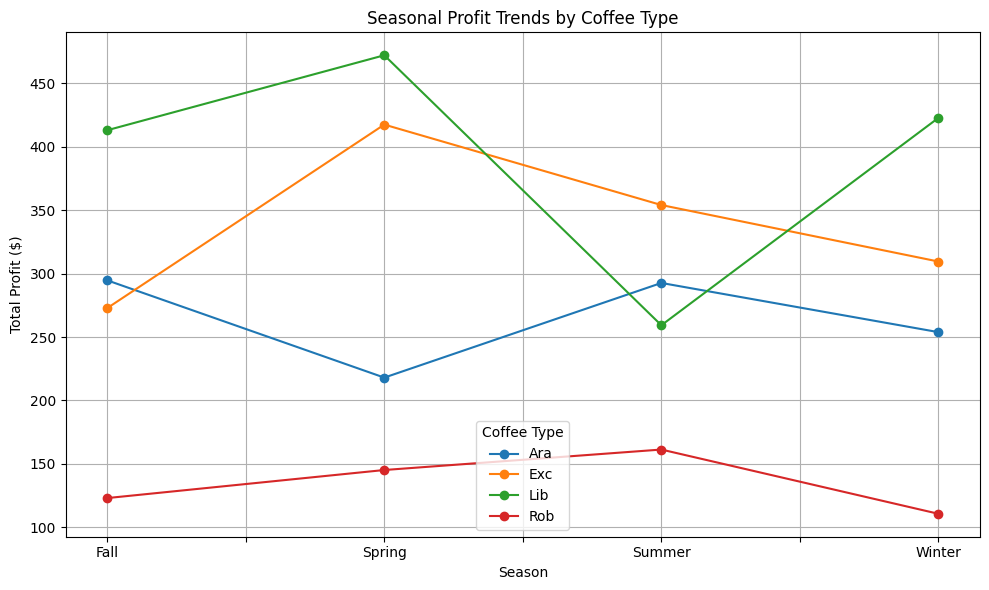

In [23]:
# Aggregating data for plotting
profit_per_type = coffee_df.groupby(['Season', 'Coffee Type_y'])['Total Profit'].sum().reset_index()

pivot_df = profit_per_type.pivot(index='Season', columns='Coffee Type_y', values='Total Profit')

pivot_df.plot(kind='line', marker='o', figsize=(10,6))
plt.title("Seasonal Profit Trends by Coffee Type")
plt.xlabel("Season")
plt.ylabel("Total Profit ($)")
plt.grid(True)
plt.legend(title="Coffee Type")
plt.tight_layout()
plt.show()

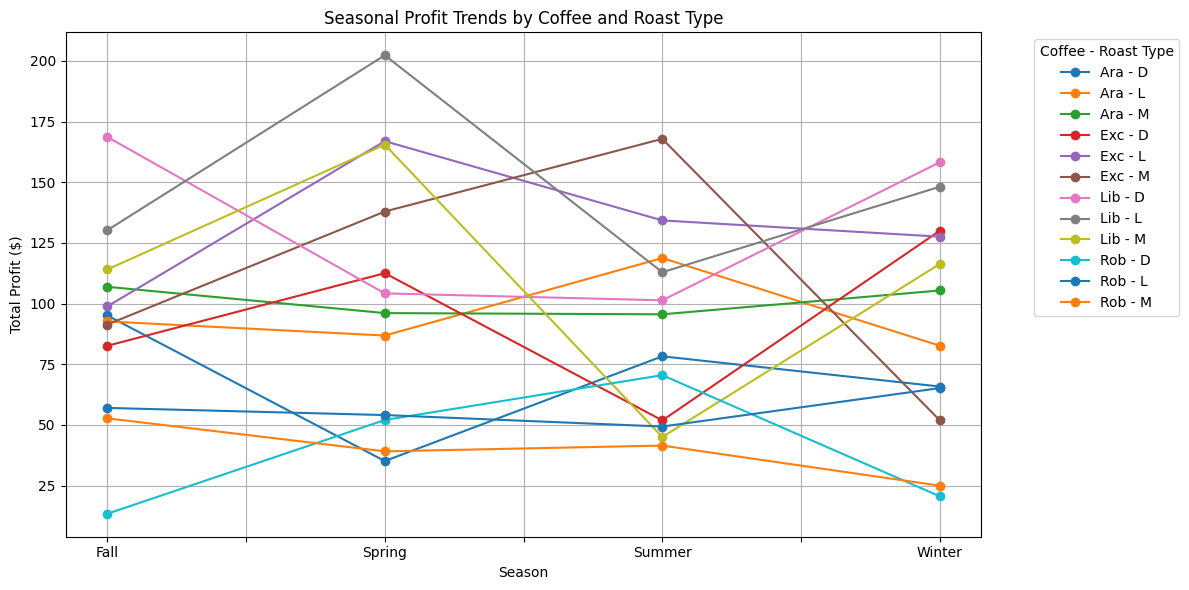

In [24]:
# Grouping by Season, Coffee Type, and Roast Type to get total profit
profit_per_combo = coffee_df.groupby(['Season', 'Coffee Type_y', 'Roast Type_y'])['Total Profit'].sum().reset_index()

# Create a new column to combine Coffee Type and Roast Type for clearer labels
profit_per_combo['CoffeeRoast'] = profit_per_combo['Coffee Type_y'] + ' - ' + profit_per_combo['Roast Type_y']

# Pivot for plotting
pivot_df = profit_per_combo.pivot(index='Season', columns='CoffeeRoast', values='Total Profit')

# Plotting
pivot_df.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Seasonal Profit Trends by Coffee and Roast Type")
plt.xlabel("Season")
plt.ylabel("Total Profit ($)")
plt.grid(True)
plt.legend(title="Coffee - Roast Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#

// INSERT TRANSITIONAL STATEMENT HERE

#### _`"How does loyalty card ownership influence customer purchasing behavior?"`_ 🧑💳✨

// T TEST

// DOT PLOT

// Do loyalty card owners order in bigger quantities of coffee beans compared to non-owners?

// INSERT TRANSITIONAL STATEMENT HERE

#### _`"Do the coffee products with higher unit prices generate more profit?"`_ ☕💰✨

In this analysis, we aim to determine whether there is a statistical relationship between the **unit price** of coffee products and their **total profit**. Specifically, we want to know if products with higher prices tend to generate more profit.

To answer this question, we focus on the following variables from the `products` dataset:

- **Unit Price**: The retail price per unit of each coffee product.
- **Profit**: The total profit associated with each product.

To assess this, we will use the **Pearson correlation coefficient**, which measures the strength and direction of a linear relationship between two continuous variables.

Before conducting the test, we define our hypotheses:

**Null Hypothesis (H₀)**: There is no linear correlation between unit price and profit.  
**Alternative Hypothesis (Hₐ)**: There is a significant linear correlation between unit price and profit.

We will calculate the Pearson correlation coefficient and interpret both the correlation value and the associated p-value to determine if the result is statistically significant.

In [ ]:
corr, p_value = pearsonr(products['Unit Price'], products['Profit'])

print(f"Pearson correlation: {corr:.3f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation: 0.939
P-value: 0.0000


The Pearson correlation coefficient between **Unit Price** and **Profit** is **0.939**, indicating a **very strong positive linear relationship**. 

Additionally, the **p-value is less than 0.05** (p = 0.0000), which means the result is **statistically significant**. Therefore, we **reject the null hypothesis**.

The following scatterplot further illustrates this relationship.

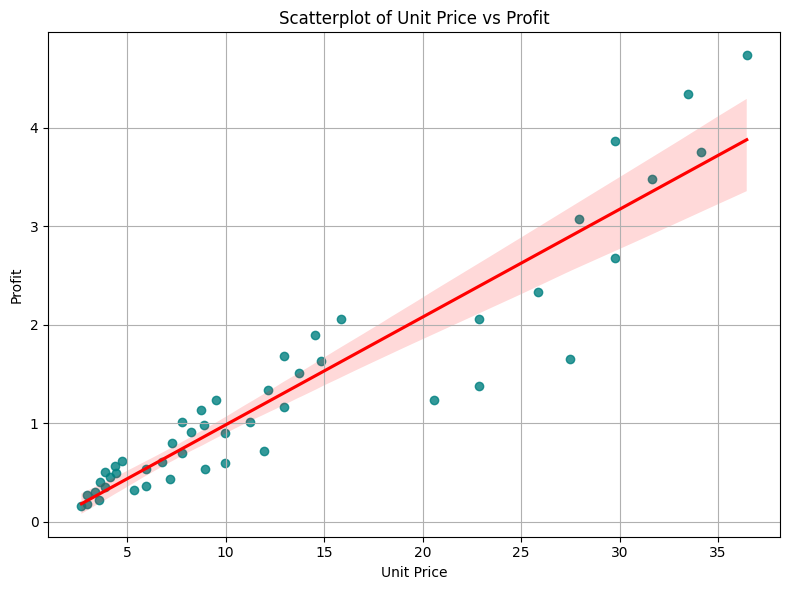

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=products, x='Unit Price', y='Profit', color='teal', line_kws={"color": "red"})

plt.title('Scatterplot of Unit Price vs Profit')
plt.xlabel('Unit Price')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

**Figure 1.**  
The scatterplot displays the relationship between **Unit Price** and **Profit** for each coffee product in the dataset. Each teal point represents a product, with its unit price on the x-axis and the corresponding profit on the y-axis.

The red regression line illustrates the overall linear trend. As shown, products with higher unit prices tend to generate higher profits, confirming the positive relationship observed in the Pearson correlation analysis (r = 0.939, p < 0.001).

📌 **Conclusion**: There exists a statistically significant linear correlation between unit price and profit among coffee products.

While our initial analysis shows a strong positive correlation between unit price and profit, this does not account for how well each product actually sells. High-priced items may yield high per-unit profits, but low sales volumes could limit their total profitability. To explore this further, we now ask:

**Do sales volumes influence total profit for higher-priced coffee products?**

To answer this question, we focus on the following variables:

- From the `products` dataset:
  - **Unit Price**: The retail price per unit of each coffee product.
  - **Profit**: The total profit associated with each product.
- From the `orders` dataset:
  - **Quantity**: The number of units ordered per product.

This analysis will help determine whether limited demand for expensive products affects their overall contribution to profit.

Before conducting the test, we define our hypotheses:

**Null Hypothesis (H₀)**: There is no significant linear correlation between sales volume (Quantity) and total profit for higher-priced coffee products.  
**Alternative Hypothesis (Hₐ)**: There is a significant linear correlation between sales volume (Quantity) and total profit for higher-priced coffee products.

We will calculate the Pearson correlation coefficient and evaluate the associated p-value. This will allow us to determine both the strength of the linear relationship and whether the result is statistically significant at the conventional 0.05 significance level.

We will use `clean_coffee_df`, a merged and cleaned dataset combining product and order details needed to compute total profit per product.

### Step 1: Group by Product

We group the merged data by each product to calculate:
- Total quantity sold
- Per-unit profit and unit price (from `products`)
- Total profit = Quantity × Profit

In [ ]:
grouped = clean_coffee_df.groupby(['Product ID', 'Coffee Type', 'Roast Type']) \
    .agg({
        'Quantity': 'sum',
        'Profit': 'first',
        'Unit Price': 'first'
    }).reset_index()

grouped['Total Profit'] = grouped['Quantity'] * grouped['Profit']
grouped.head()

,Product ID,Coffee Type,Roast Type,Quantity,Profit,Unit Price,Total Profit
0,A-D-0.2,Ara,D,97,0.26865,2.985,26.05905
1,A-D-0.5,Ara,D,89,0.53730,5.970,47.81970
2,A-D-1,Ara,D,49,0.89550,9.950,43.87950
3,A-D-2.5,Ara,D,76,2.05965,22.885,156.53340
4,A-L-0.2,Ara,L,50,0.34965,3.885,17.48250


### Step 2: Focus on High-Priced Products

We define "high-priced" as products whose unit price falls in the top 25% of all products.

In [ ]:
q3_price = grouped['Unit Price'].quantile(0.75)
high_priced = grouped[grouped['Unit Price'] >= q3_price]
high_priced.head()

,Product ID,Coffee Type,Roast Type,Quantity,Profit,Unit Price,Total Profit
3,A-D-2.5,Ara,D,76,2.05965,22.885,156.53340
7,A-L-2.5,Ara,L,86,2.68065,29.785,230.53590
11,A-M-2.5,Ara,M,97,2.32875,25.875,225.88875
15,E-D-2.5,Exc,D,66,3.07395,27.945,202.88070
19,E-L-2.5,Exc,L,72,3.75705,34.155,270.50760


### Step 3: Correlation Analysis

We calculate the Pearson correlation coefficient to assess the linear relationship between **quantity sold** and **total profit** for high-priced products.

In [ ]:
corr, pval = pearsonr(high_priced['Quantity'], high_priced['Total Profit'])

print(f"Pearson correlation: {corr:.3f}")
print(f"P-value: {pval:.4f}")

Pearson correlation: 0.301
P-value: 0.3418


The Pearson correlation coefficient between **Quantity** and **Total Profit** for higher-priced products is **0.301**, indicating a **weak positive linear relationship**. 

However, the **p-value is greater than 0.05** (p = 0.3418), so the result is **not statistically significant**. Therefore, we **fail to reject the null hypothesis**.

#### Step 4: Visualization

To visually support the correlation result, we generate a scatterplot with a regression line showing how quantity sold relates to total profit for high-priced products.

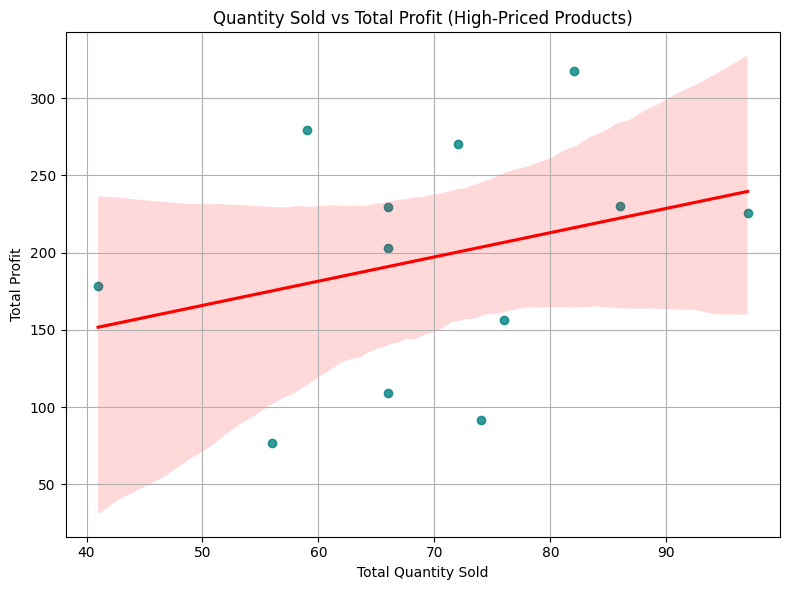

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=high_priced,
    x='Quantity',
    y='Total Profit',
    color='teal',
    line_kws={"color": "red"}
)

plt.title('Quantity Sold vs Total Profit (High-Priced Products)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

**Figure 2.**  
The scatterplot illustrates the relationship between **quantity sold** and **total profit** for high-priced coffee products. Each teal point represents a product, where the x-axis shows the total number of units sold and the y-axis displays the corresponding total profit.

The red regression line represents the overall linear trend based on Pearson correlation analysis. While there is a slight upward trend, the distribution of points appears scattered, and no strong linear relationship is visually evident.

This aligns with the earlier statistical result (r = 0.301, p = 0.3418), suggesting that the correlation between sales volume and total profit among high-priced items is weak and not statistically significant. This indicates that simply pricing products higher does not guarantee greater overall profit if the products do not sell in large volumes.

📌 **Conclusion**: There is no statistically significant linear correlation between sales volume and total profit for high-priced coffee products.

// PEARSON CORRELATION

// Do sales volumes influence total profit for higher-priced products?

# Conclusion ✅

// INSERT CONCLUSION HERE